# Joint SC and FC analysis

We can analyze the brain network using SC and FC. The comparison of the results allows for studying the relationship between structure and function. In other words, does a node with many anatomical connections (SC) also has strong correlations with other regions (FC)?

In [376]:
import numpy as np
import networkx as nx
import scipy.stats as stt

import sireneta as sna
from sireneta import netmodels

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16

Let's have a look at an example random matrix.
We check:
- the influence of the weight distribution (spread to dipart from binary network)
- the density

In [377]:
# another example data from HCP with both structural and functional connectomes
A = netmodels.GenRandomWeightedNet(20, 0.2, np.random.uniform, low=0.5, high=1.5)

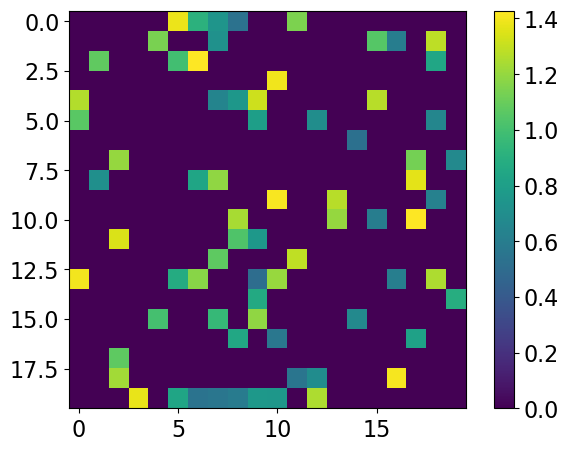

In [378]:
plt.figure()
plt.imshow(A)
plt.colorbar()
plt.tight_layout()

plt.show()

In [379]:
print(np.linalg.eigvals(A))

[ 3.39189251+0.j          1.25188252+0.77572646j  1.25188252-0.77572646j
  0.16232457+1.53396942j  0.16232457-1.53396942j  0.67843574+1.05884377j
  0.67843574-1.05884377j -0.72007057+1.2395065j  -0.72007057-1.2395065j
  0.29234695+0.51948924j  0.29234695-0.51948924j  0.38790478+0.j
 -1.14411289+0.55083982j -1.14411289-0.55083982j -1.45604775+0.j
 -1.30258262+0.j         -0.93631813+0.j         -0.70524617+0.j
 -0.31042736+0.j         -0.11078791+0.j        ]


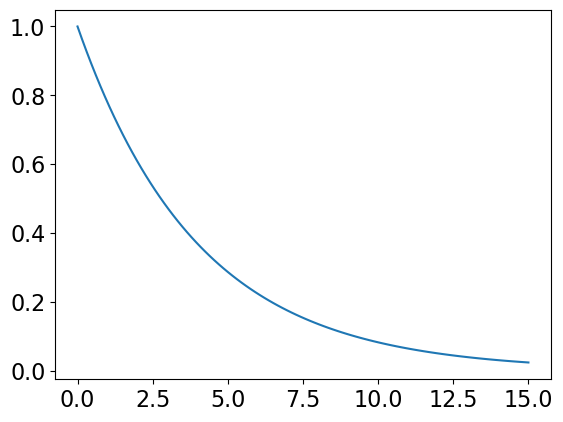

In [380]:
vt = np.linspace(0,15,100)
plt.plot(vt, np.exp(-(1.0/0.8-1.0) * vt))
plt.show()

## Calculate network responses for all 5 propagator models

Here we identify important regions (nodes) and groups of nodes determined by anatomical connections. We first look into the histogram of SC weights to binarize the matrix and create an undirected binary graph.

- check effect of preproc (log)
- check effect of prop model: similarity matrix between prop models for different measures
- discuss equivalent of classical measures when changing prop model
    - strength across time (decide one time to check in particular?)
    - geodesic graph distance, TTP
    - hierarchical community detection (merging over time), spectral gap of random walker Lambiotte

In [381]:
# normalize connectivity with respect to largest eigenvalue
lambda_max = np.real(np.linalg.eigvals(A)).max()
A_norm = A / lambda_max

# time specifics
dt = 0.1
T = 20.1
td = np.arange(0,T, dtype=int)
tc = np.arange(0,T,dt)
nT = td.size

rdc = sna.Resp_DiscreteCascade(A, tmax=20)
rrw = sna.Resp_RandomWalk(A, tmax=20)
rcc = sna.Resp_ContCascade(A_norm, tmax=20, timestep=dt)
rlc = sna.Resp_LeakyCascade(A_norm, tau=0.8, tmax=20, timestep=dt)
rcd = sna.Resp_ContDiffusion(A_norm, tmax=20, timestep=dt, case='full')

# list of responses
ts = [td, td, tc, tc, tc]
rs = [rdc, rrw, rcc, rlc, rcd]
labels = ['dc', 'rw', 'cc', 'lc', 'cd']
n_pm = 5

# match discrete continuous times
tdt = []
for t in td:
    # equivalent continuous time
    tdt.append(int(t/dt))

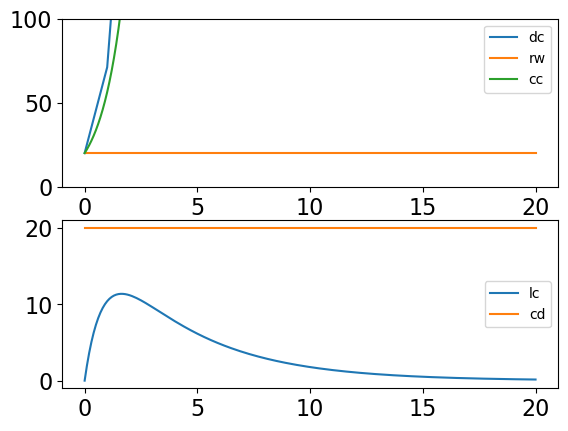

In [382]:
plt.figure()
plt.subplot(211)
for i in range(0,3):
    plt.plot(ts[i], sna.GlobalResponse(rs[i]), label=labels[i])
plt.axis(ymin=0, ymax=100)
plt.legend(fontsize=10)
plt.subplot(212)
for i in range(3,5):
    plt.plot(ts[i], sna.GlobalResponse(rs[i]), label=labels[i])
plt.legend(fontsize=10)
plt.show()

In [383]:
# node responses
inrs = []
onrs = []
for i in range(n_pm):
    inrs.append(sna.NodeResponses(rs[i])[0])
    onrs.append(sna.NodeResponses(rs[i])[1])

aspects = [0.5, 0.5, 5.0, 5.0, 5.0]

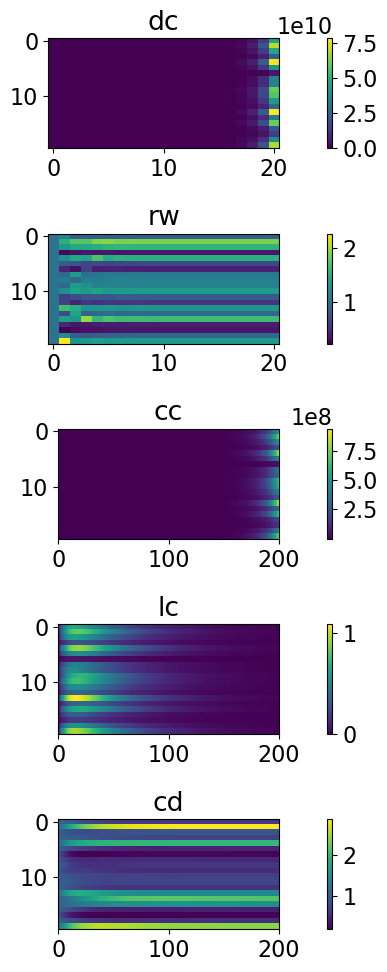

In [384]:
plt.figure(figsize=[10,10])
for i in range(n_pm):
    plt.subplot(n_pm,1,i+1)
    plt.imshow(inrs[i].T, aspect=aspects[i], interpolation='nearest')
    plt.title(labels[i])
    plt.colorbar()
plt.tight_layout()
plt.show()

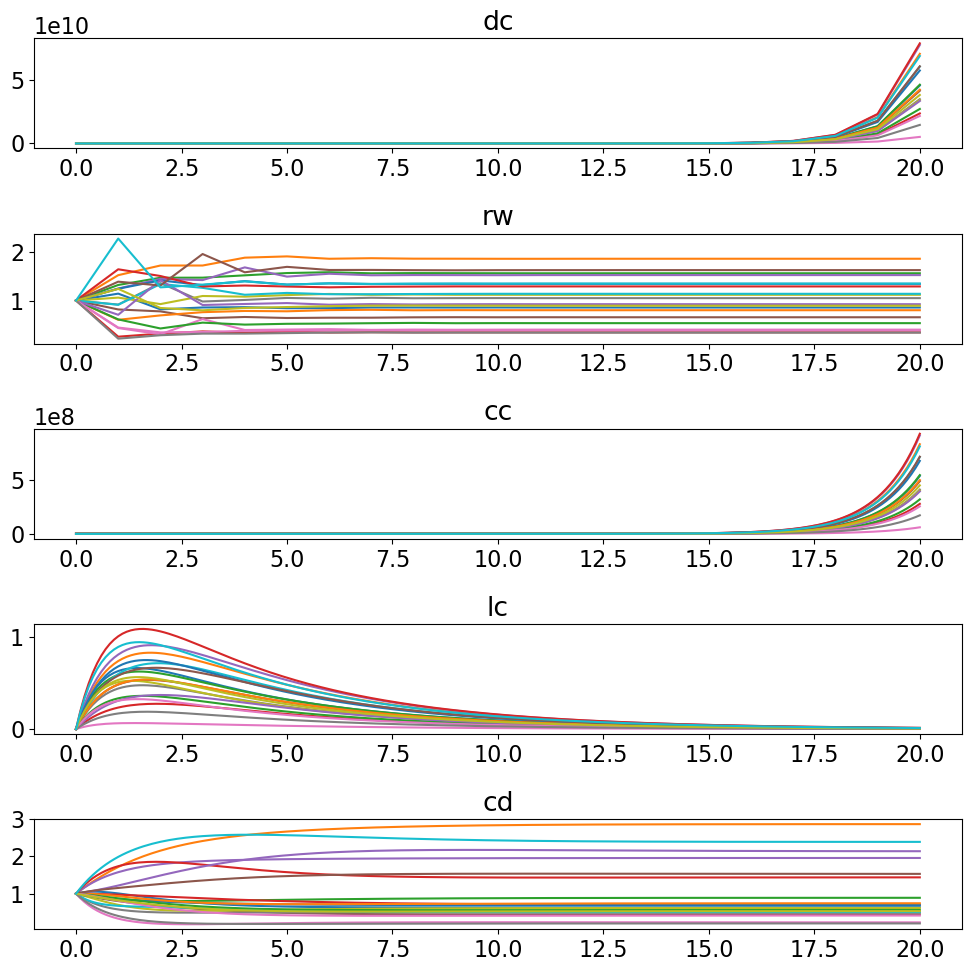

In [385]:
plt.figure(figsize=[10,10])
for i in range(n_pm):
    plt.subplot(n_pm,1,i+1)
    plt.plot(ts[i], inrs[i])
    plt.title(labels[i])
plt.tight_layout()
plt.show()

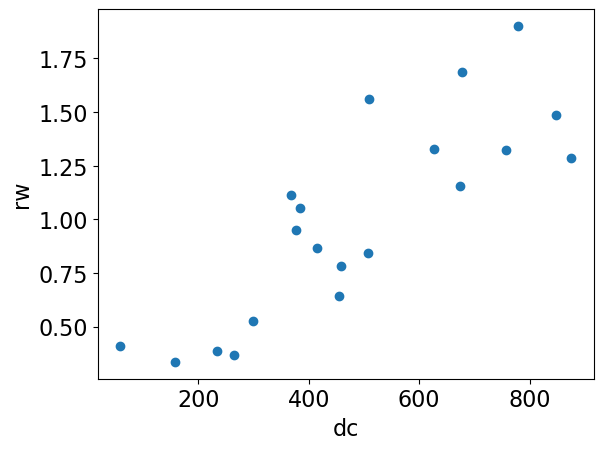

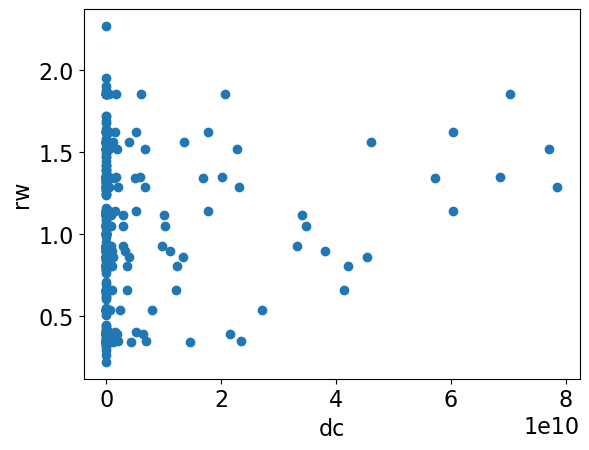

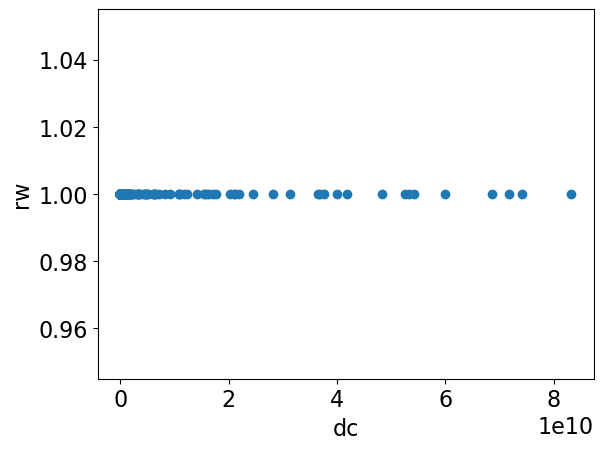

In [398]:
i = 0
j = 1

plt.figure()
plt.scatter(inrs[i][5,:], inrs[j][5,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.figure()
plt.scatter(inrs[i][td,:], inrs[j][td,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.figure()
plt.scatter(onrs[i][td,:], onrs[j][td,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.show()

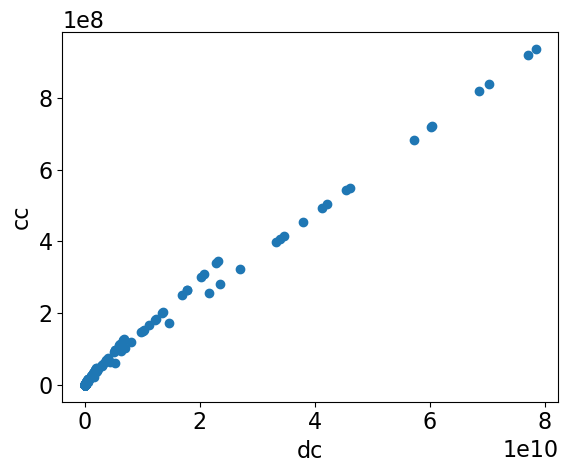

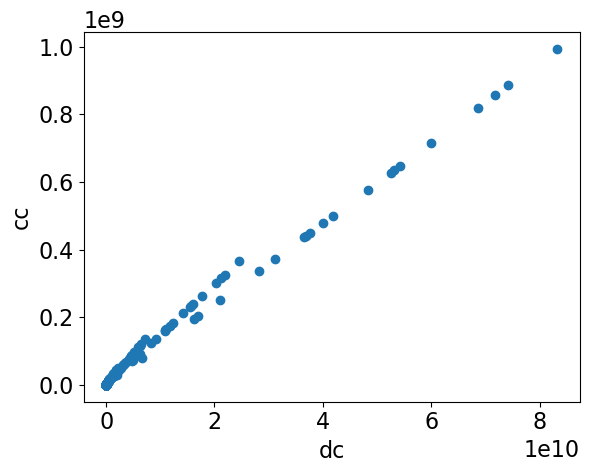

In [387]:
i = 0
j = 2

plt.figure()
plt.scatter(inrs[i][td,:], inrs[j][tdt,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.figure()
plt.scatter(onrs[i][td,:], onrs[j][tdt,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.show()

[(21, 20), (21, 20), (201, 20), (201, 20), (201, 20)]


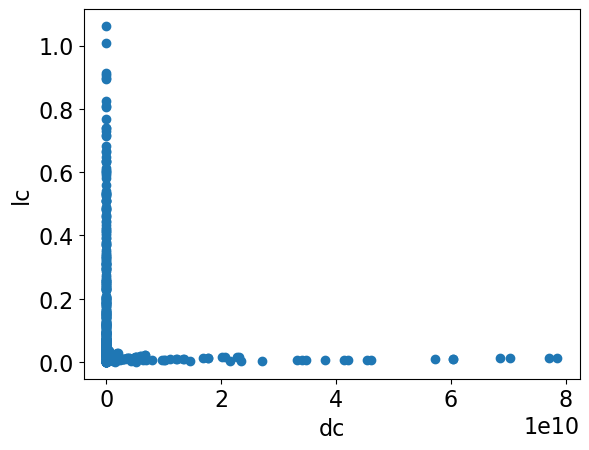

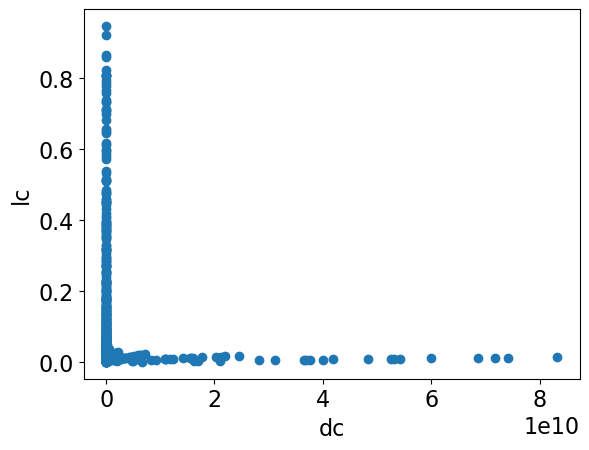

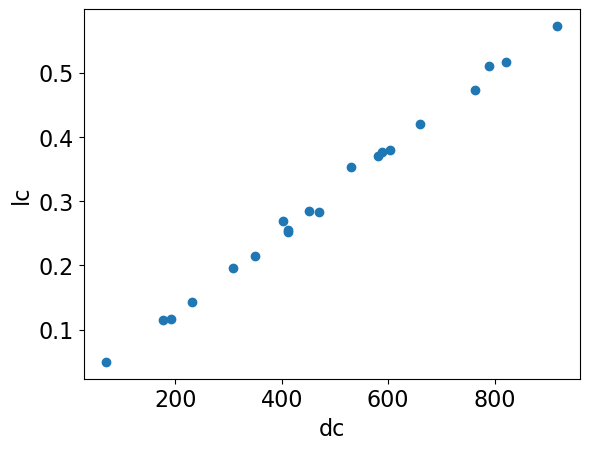

In [388]:
i = 0
j = 3

print([inrs[i].shape for i in range(n_pm)])
plt.figure()
plt.scatter(inrs[i][td,:], inrs[j][tdt,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.figure()
plt.scatter(onrs[i][td,:], onrs[j][tdt,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

t = 5
plt.figure()
plt.scatter(onrs[i][t,:], onrs[j][int(t/dt),:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.show()

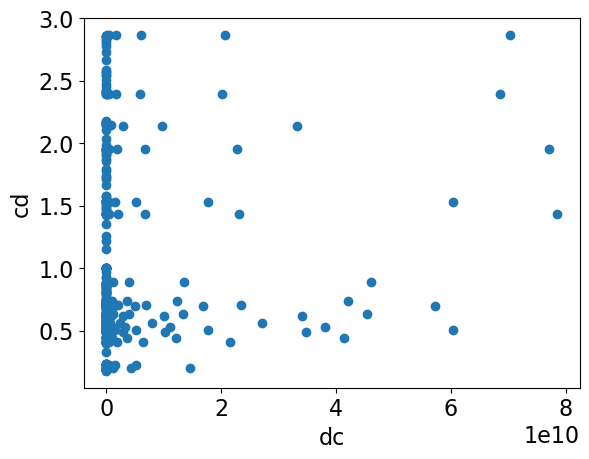

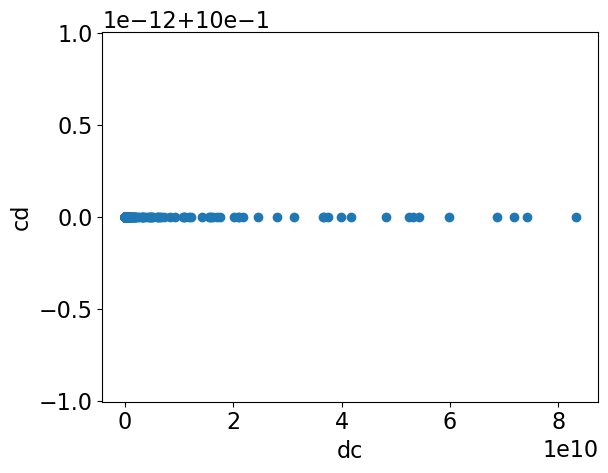

In [389]:
i = 0
j = 4

plt.figure()
plt.scatter(inrs[i][td,:], inrs[j][tdt,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.figure()
plt.scatter(onrs[i][td,:], onrs[j][tdt,:])
plt.xlabel(labels[i])
plt.ylabel(labels[j])

plt.show()

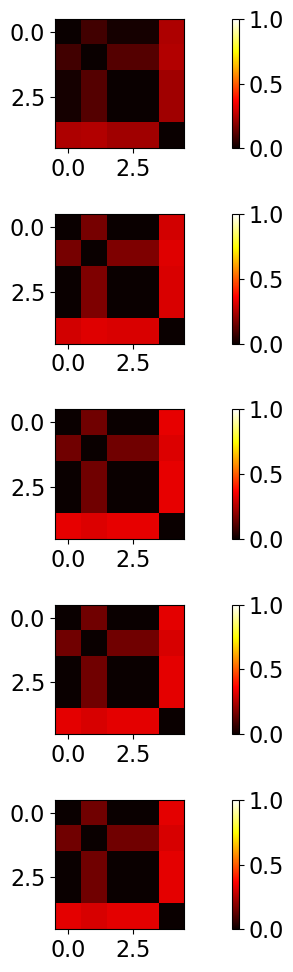

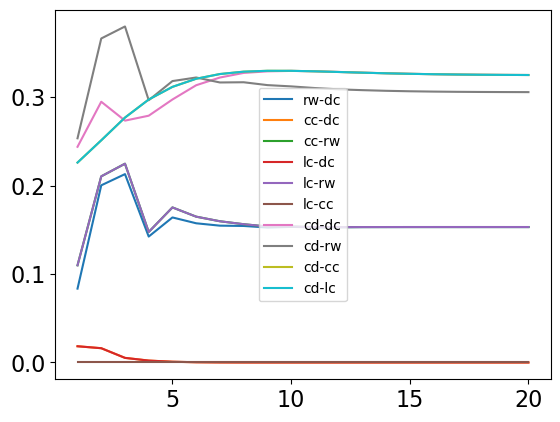

In [390]:
# similarity between node responses
dist_node = np.zeros([n_pm,n_pm,nT])
    
tts = [td, td, tdt, tdt, tdt]
    
for t in td:
    for i in range(n_pm):
        for j in range(n_pm):
            dist_node[i,j,t] = 1.0 - stt.pearsonr(inrs[i][tts[i][t],:], inrs[j][tts[j][t],:])[0]
            
plt.figure(figsize=[10,10])
for it, t in enumerate(range(1,nT,4)):
    plt.subplot(5,1,it+1)
    plt.imshow(dist_node[:,:,t], vmin=0.0, vmax=1.0, cmap='hot')
    plt.colorbar()
plt.tight_layout()
plt.show()

plt.figure()
for i in range(n_pm):
    for j in range(i):
        plt.plot(td, dist_node[i,j,:], label=str(labels[i]+'-'+labels[j]))
plt.legend(fontsize=10)
plt.show()

# TTP

- for DC, we choose 1 as a threshold
- for LC, there is a peak
- 

Text(0, 0.5, 'cc')

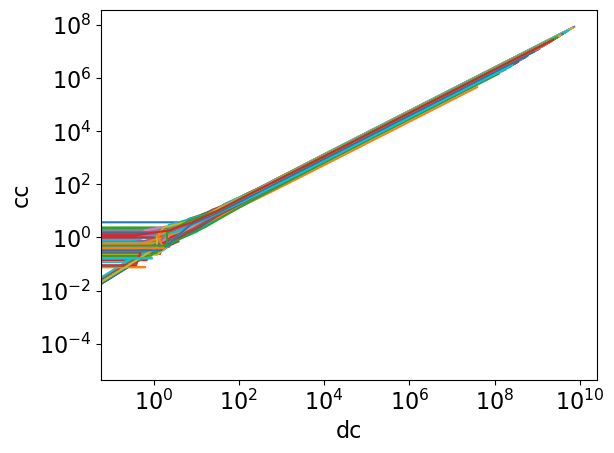

In [391]:
for i in range(8):
    for j in range(8):
        plt.loglog(rdc[td,i,j], rcc[tdt,i,j])
plt.xlabel('dc')
plt.ylabel('cc')

In [392]:
dist_rdc = np.zeros_like(A)
dist_rdc2 = np.zeros_like(A)
dist_rcc = np.zeros_like(A)
dist_rcc2 = np.zeros_like(A)
ttc_rcd = np.zeros_like(A)
ttc_rrw = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        dist_rdc[i,j] = min(np.argwhere(rdc[:,i,j]>=1))
        dist_rdc2[i,j] = min(np.argwhere(rdc[:,i,j]>=10))
        dist_rcc[i,j] = min(np.argwhere(rcc[:,i,j]>=1))
        dist_rcc2[i,j] = min(np.argwhere(rcc[:,i,j]>=10))
        diff_tmp = np.abs(np.diff(rcd[:,i,j]))
        ttc_rcd[i,j] = min(np.argwhere(diff_tmp<=0.05*diff_tmp.max()))
        diff_tmp = np.abs(np.diff(rrw[:,i,j]))
        ttc_rrw[i,j] = min(np.argwhere(diff_tmp<=0.05*diff_tmp.max()))

ttp_rlc = sna.Time2Peak(rlc, timestep=dt)

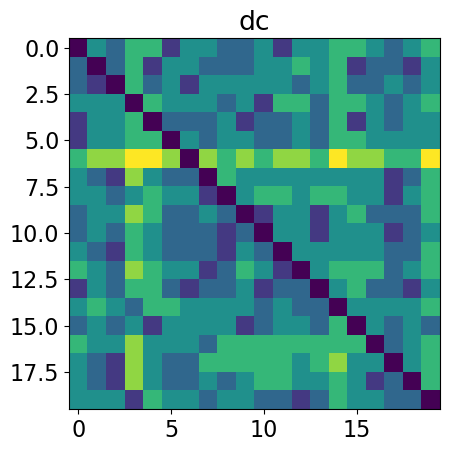

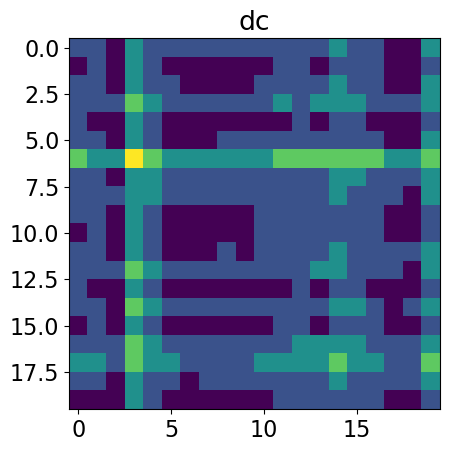

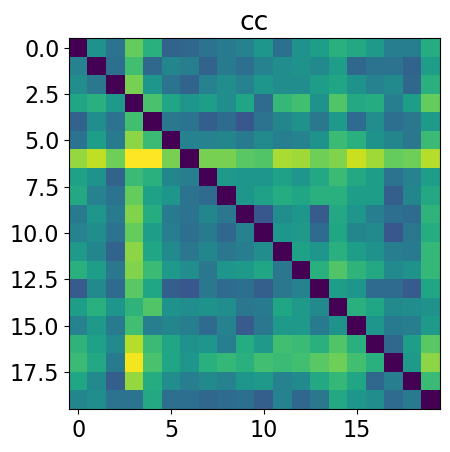

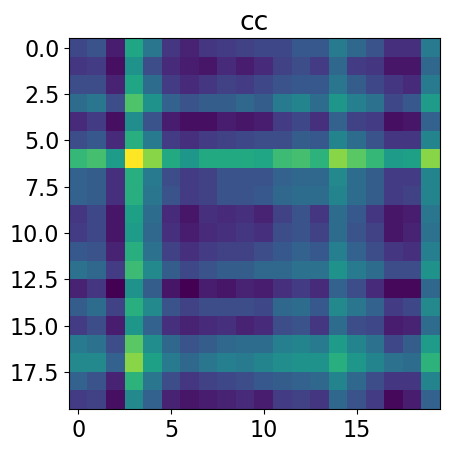

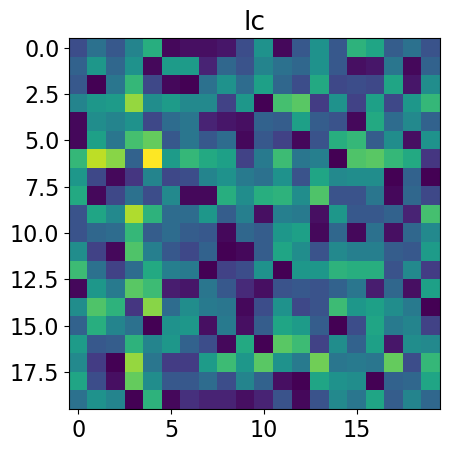

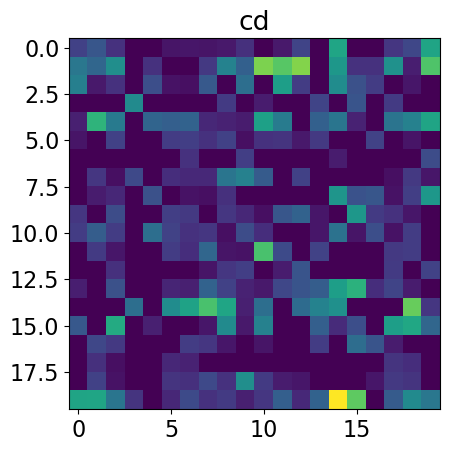

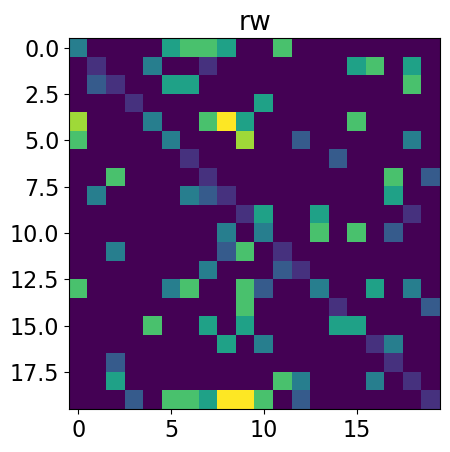

In [393]:
plt.figure()
plt.imshow(dist_rdc)
plt.title('dc')
plt.tight_layout()

plt.figure()
plt.imshow(dist_rdc2)
plt.title('dc')
plt.tight_layout()

plt.figure()
plt.imshow(dist_rcc)
plt.title('cc')
plt.tight_layout()

plt.figure()
plt.imshow(dist_rcc2)
plt.title('cc')
plt.tight_layout()

plt.figure()
plt.imshow(ttp_rlc)
plt.title('lc')
plt.tight_layout()

plt.figure()
plt.imshow(ttc_rcd)
plt.title('cd')
plt.tight_layout()


plt.figure()
plt.imshow(ttc_rrw)
plt.title('rw')
plt.tight_layout()

plt.show()

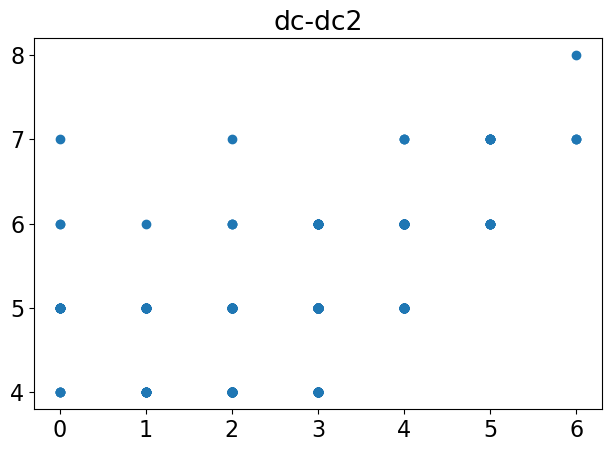

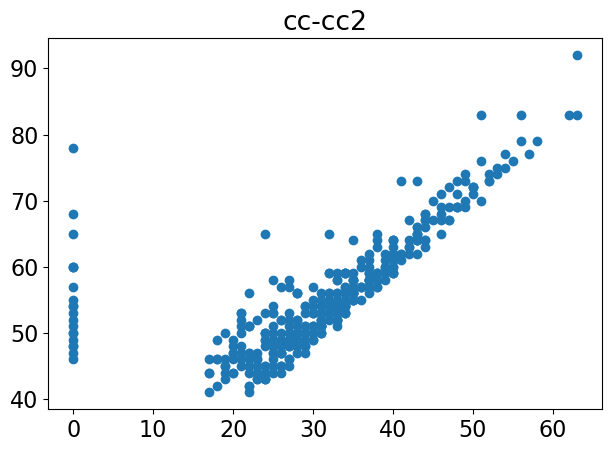

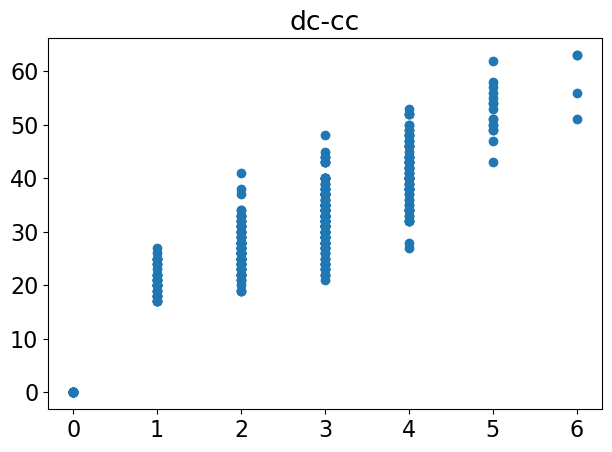

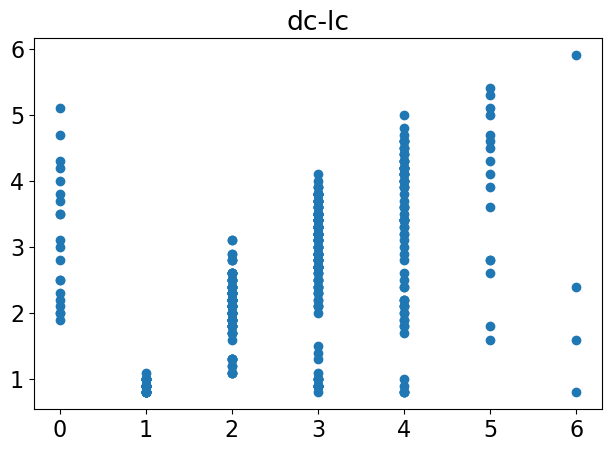

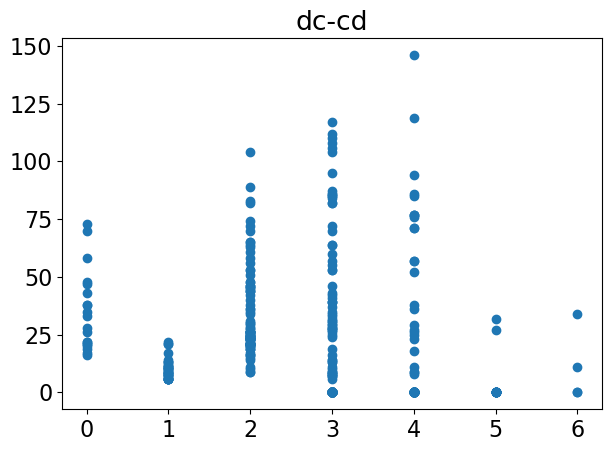

In [394]:
plt.figure()
plt.scatter(dist_rdc, dist_rdc2)
plt.title('dc-dc2')
plt.tight_layout()

plt.figure()
plt.scatter(dist_rcc, dist_rcc2)
plt.title('cc-cc2')
plt.tight_layout()

plt.figure()
plt.scatter(dist_rdc, dist_rcc)
plt.title('dc-cc')
plt.tight_layout()

plt.figure()
plt.scatter(dist_rdc, ttp_rlc)
plt.title('dc-lc')
plt.tight_layout()

plt.figure()
plt.scatter(dist_rdc, ttc_rcd)
plt.title('dc-cd')
plt.tight_layout()

plt.show()

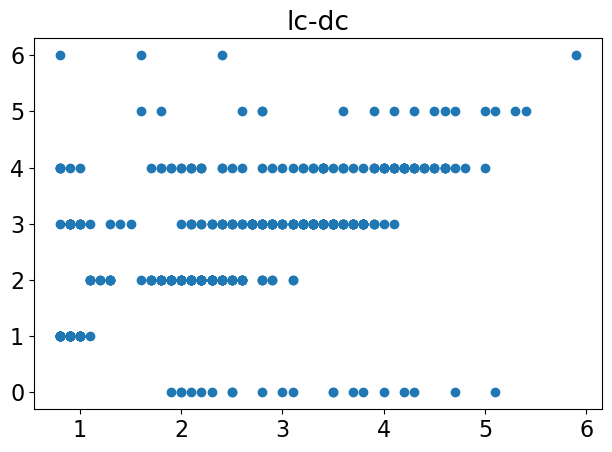

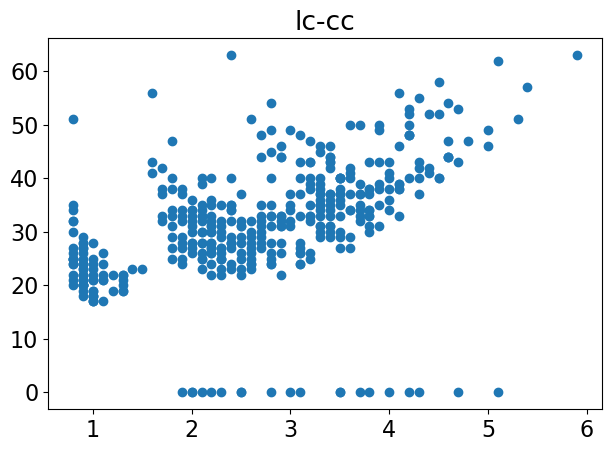

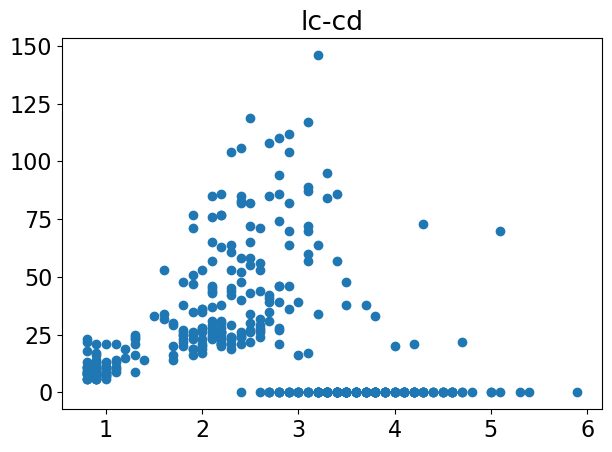

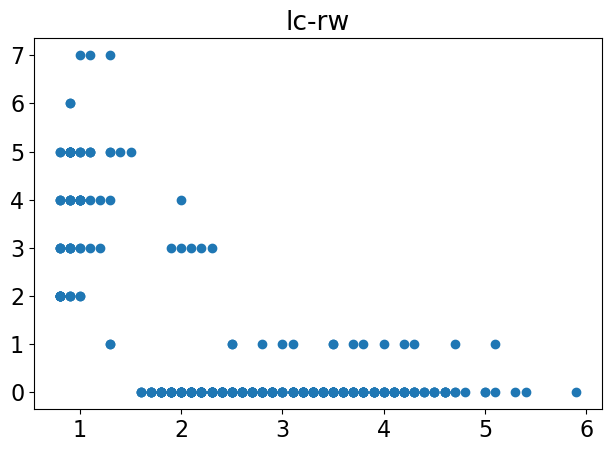

In [395]:
plt.figure()
plt.scatter(ttp_rlc, dist_rdc)
plt.title('lc-dc')
plt.tight_layout()

plt.figure()
plt.scatter(ttp_rlc, dist_rcc)
plt.title('lc-cc')
plt.tight_layout()

plt.figure()
plt.scatter(ttp_rlc, ttc_rcd)
plt.title('lc-cd')
plt.tight_layout()

plt.figure()
plt.scatter(ttp_rlc, ttc_rrw)
plt.title('lc-rw')
plt.tight_layout()

plt.show()

# Community detection



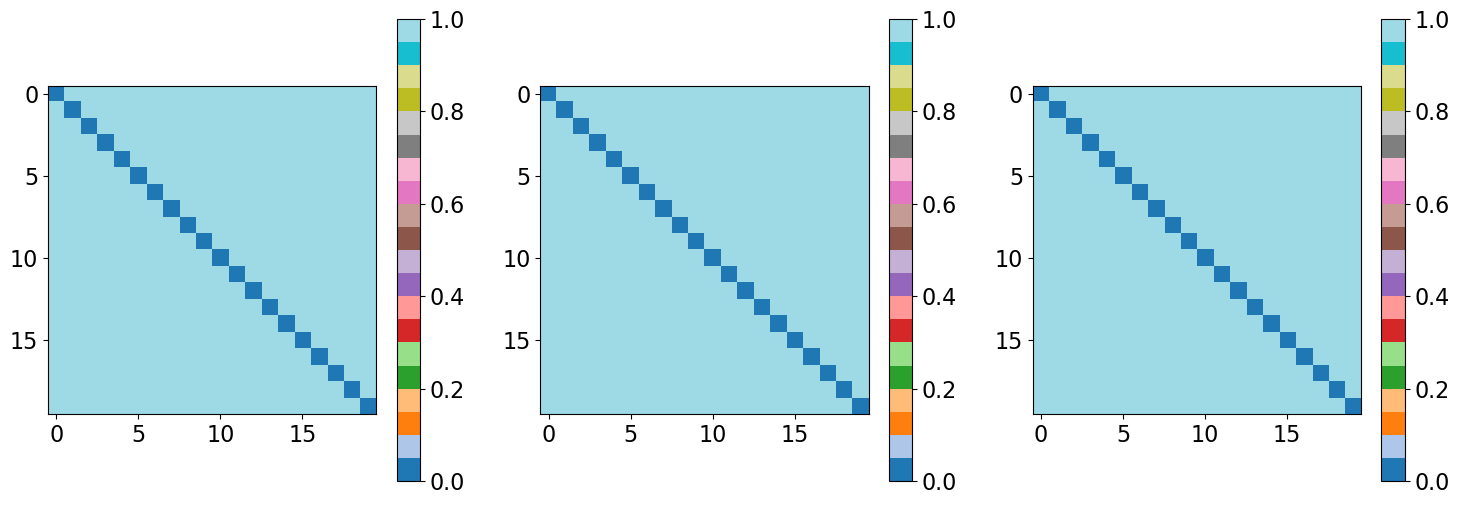

In [397]:
N = A.shape[0]
v_comm = np.zeros([N,N,nT])

for it, t in enumerate(tdt[1:]):
    B = np.copy(rlc[t,:,:])
    np.fill_diagonal(B, 0)
    G = nx.from_numpy_array(B)
    list_com = nx.community.greedy_modularity_communities(G)
    for c in range(len(list_com)):
        for i in list_com[c]:
            for j in list_com[c]:
                # check if nodes i and j in same community for SC then FC
                if not i==j:
                    v_comm[i,j,it] = c+1

plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
plt.imshow(v_comm[:,:,0], vmin=0.0, cmap='tab20')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(v_comm[:,:,5], vmin=0.0, cmap='tab20')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(v_comm[:,:,10], vmin=0.0, cmap='tab20')
plt.colorbar()
